In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
 #divise les donner de dataset

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score , f1_score
#recall tres important dans les maladies pour une resultats tres precise
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
#warnings.filterwarnings('ignore')

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEEPLR/diabetes.csv')

#EXPLORE DAta


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.duplicated().sum()

0

#Analysis


In [ ]:
data.corr()
#relation entre columns and ligne

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

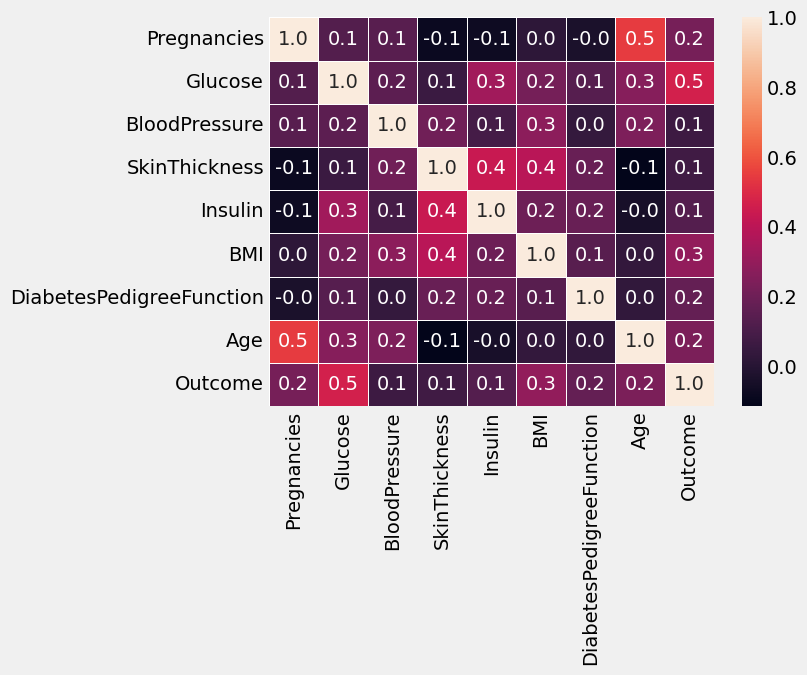

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidth=.5)


<Axes: xlabel='Outcome', ylabel='count'>

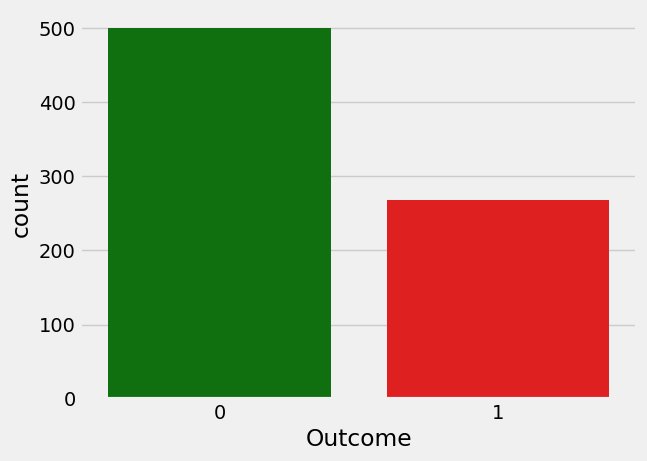

In [ ]:
sns.countplot(x='Outcome', data=data , palette=['g', 'r'])

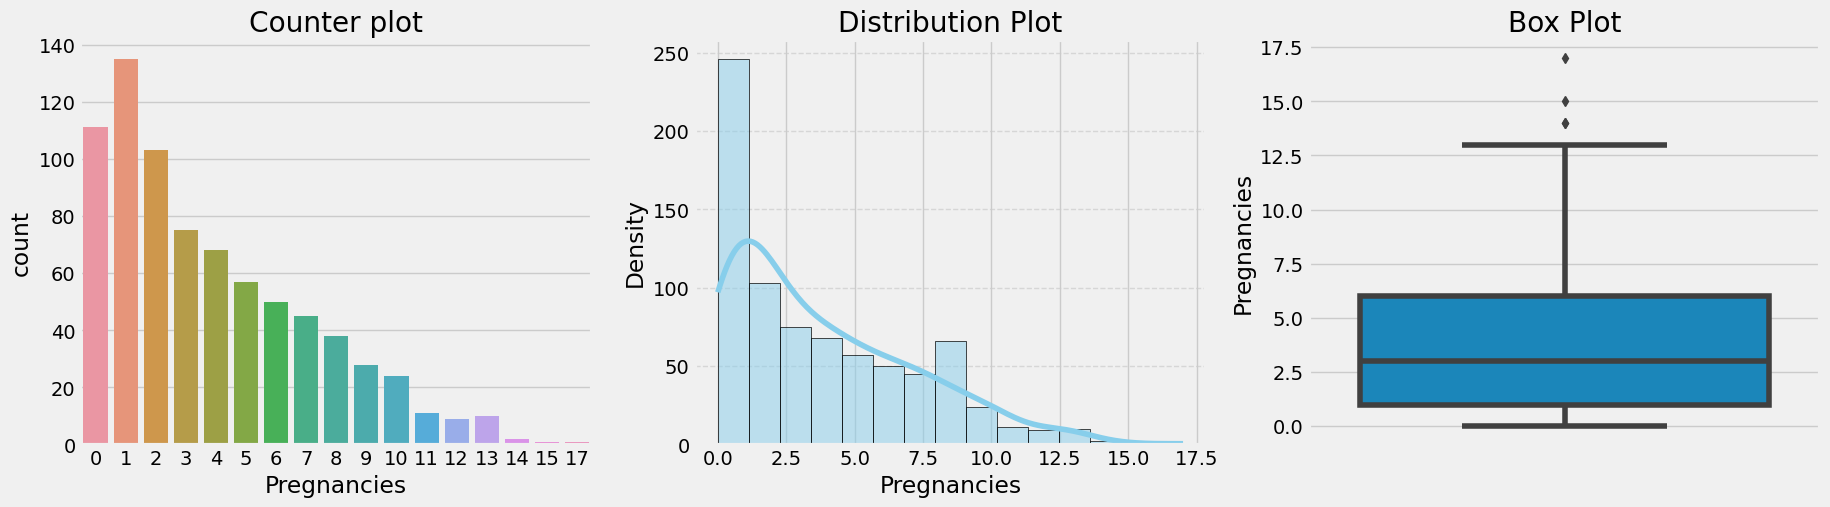

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x='Pregnancies', data = data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.histplot(data['Pregnancies'], kde=True, color='skyblue', bins=15, edgecolor='black')
# Ajouter une grille
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Ajouter des étiquettes d'axe
plt.xlabel('Pregnancies')
plt.ylabel('Density')


plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])

plt.show()

<Axes: >

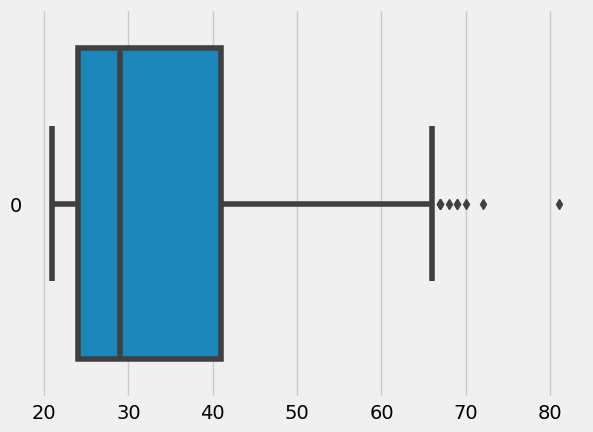

In [ ]:
sns.boxplot(data.Age, orient='h')

# Creat Model

In [ ]:
x=data.drop('Outcome', axis =1)
y=data['Outcome']
#y=data.Outcome

In [ ]:
#####Normalization
x_norm = x.apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [ ]:
x_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [ ]:
#####Splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=42)

In [ ]:
####one hot- encoding

onehot = pd.get_dummies(y_train)
target_labels =onehot.columns
y_train= np.array(onehot)


onehot= pd.get_dummies(y_test)
target_labels = onehot.columns
y_test= np.array(onehot)

In [ ]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1,

In [ ]:
x_train.shape[1]

8

In [ ]:
###Creat model
#from keras.callbacks import EarlyStopping
#early_Stopping_monitor=EarlyStopping(patience= 10)
#n_cols = x_train.shape[1]
#model= Sequential()
#model.add(Dense(100,activation ='relu', input_shape =(n_cols,)))
#model.add(Dense(100,activation ='relu'))
#model.add(Dense(100,activation ='relu'))
#model.add(Dense(50,activation ='relu'))
#model.add(Dense(40,activation ='relu'))
#model.add(Dense(2,activation ='softmax'))
#model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics= ['accuracy'])
#model.fit(x_train , y_train , validation_split = 0.3, epochs= 100 , callbacks = [early_Stopping_monitor])



from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense , Conv2D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Supposons que x_train et y_train sont vos données d'entraînement et d'étiquettes respectivement
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ajouter une dimension pour représenter les canaux (1 car il s'agit de données unidimensionnelles)
x_train_cnn = np.expand_dims(x_train.to_numpy(), axis=2)

early_stopping_monitor = EarlyStopping(patience=10)

model = Sequential()

# Ajouter une couche de convolution avec une fonction d'activation ReLU
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Ajouter une couche de pooling pour réduire les dimensions spatiales
model.add(MaxPooling1D(pool_size=2))

# Aplatir les données pour les passer à travers une couche dense
model.add(Flatten())

# Ajouter une couche dense pour la classification
model.add(Dense(128, activation='relu'))

# Ajouter une couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(x_train_cnn, y_train, validation_split=0.3, epochs=100, callbacks=[early_stopping_monitor])



Epoch 1/100
14/14 [==============================] - 2s 36ms/step - loss: 5.7915 - accuracy: 0.5221 - val_loss: 1.8902 - val_accuracy: 0.3946
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 1.8087 - accuracy: 0.5291 - val_loss: 0.7975 - val_accuracy: 0.6703
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.7955 - accuracy: 0.6434 - val_loss: 0.7017 - val_accuracy: 0.6432
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6523 - accuracy: 0.6620 - val_loss: 0.7303 - val_accuracy: 0.5568
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.6620 - val_loss: 0.7861 - val_accuracy: 0.5514
Epoch 6/100
14/14 [==============================] - 0s 8ms/step - loss: 0.8007 - accuracy: 0.6503 - val_loss: 0.8517 - val_accuracy: 0.6432
Epoch 7/100
14/14 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.6247 - val_loss: 0.9026 - val_accuracy: 0.6595
Epoch 8/100

Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 0.9293 - accuracy: 0.5991 - val_loss: 0.8426 - val_accuracy: 0.6324
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6713 - val_loss: 0.5917 - val_accuracy: 0.7189
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5697 - accuracy: 0.6946 - val_loss: 0.5910 - val_accuracy: 0.7243
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5572 - accuracy: 0.7040 - val_loss: 0.5764 - val_accuracy: 0.6973
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5582 - accuracy: 0.6970 - val_loss: 0.6461 - val_accuracy: 0.6811
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5617 - accuracy: 0.7133 - val_loss: 0.6503 - val_accuracy: 0.6973
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6239 - accuracy: 0.6783 - val_loss: 0.6217 - val_accuracy: 0.6865
Epoch 8/100


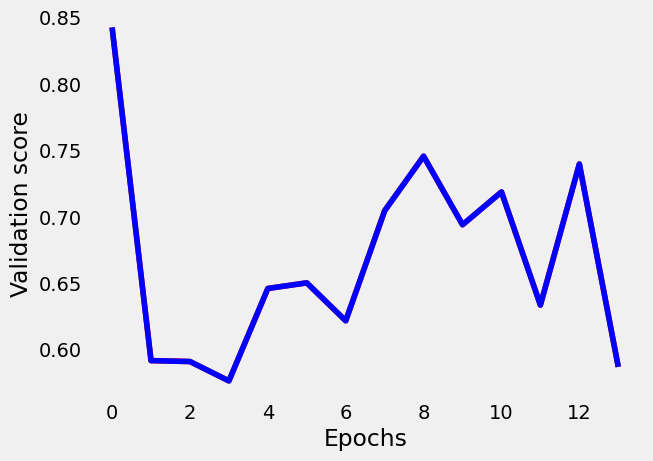

In [ ]:
### to plot
from keras.callbacks import EarlyStopping
early_Stopping_monitor = EarlyStopping(patience =10)
import matplotlib.pyplot as plt
model_training = model.fit(x_train, y_train, validation_split=0.3, epochs=100, callbacks=[early_Stopping_monitor])
 #create the plot
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()





In [ ]:
model.save('Diabetes_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model




model =load_model('Diabetes_model.h5')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 128)               12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
####make prediction


prediction = model.predict(x_test)





5/5 [==============================] - 0s 5ms/step


In [ ]:
prediction

array([[0.50600123],
       [0.29029685],
       [0.33802673],
       [0.12059055],
       [0.2277369 ],
       [0.62567985],
       [0.22843464],
       [0.3207788 ],
       [0.5310676 ],
       [0.49804825],
       [0.4492193 ],
       [0.7420266 ],
       [0.11673637],
       [0.07409098],
       [0.12519209],
       [0.3075871 ],
       [0.18599577],
       [0.09494571],
       [0.4132747 ],
       [0.29620147],
       [0.23137699],
       [0.04305477],
       [0.49043143],
       [0.17620772],
       [0.3809526 ],
       [0.865506  ],
       [0.5346555 ],
       [0.03648154],
       [0.07288255],
       [0.08817189],
       [0.32618445],
       [0.54465246],
       [0.06995291],
       [0.54949355],
       [0.07887616],
       [0.25929502],
       [0.40642455],
       [0.07358395],
       [0.4771029 ],
       [0.6942263 ],
       [0.09597984],
       [0.53901064],
       [0.49323595],
       [0.23933381],
       [0.01985372],
       [0.06509991],
       [0.6601294 ],
       [0.288

In [ ]:
prediction[:, 0]


array([0.50600123, 0.29029685, 0.33802673, 0.12059055, 0.2277369 ,
       0.62567985, 0.22843464, 0.3207788 , 0.5310676 , 0.49804825,
       0.4492193 , 0.7420266 , 0.11673637, 0.07409098, 0.12519209,
       0.3075871 , 0.18599577, 0.09494571, 0.4132747 , 0.29620147,
       0.23137699, 0.04305477, 0.49043143, 0.17620772, 0.3809526 ,
       0.865506  , 0.5346555 , 0.03648154, 0.07288255, 0.08817189,
       0.32618445, 0.54465246, 0.06995291, 0.54949355, 0.07887616,
       0.25929502, 0.40642455, 0.07358395, 0.4771029 , 0.6942263 ,
       0.09597984, 0.53901064, 0.49323595, 0.23933381, 0.01985372,
       0.06509991, 0.6601294 , 0.28890005, 0.27940273, 0.4653256 ,
       0.16362047, 0.4699595 , 0.50025177, 0.36233282, 0.07435606,
       0.02801012, 0.64350325, 0.06765796, 0.23277447, 0.7276029 ,
       0.7878733 , 0.53972137, 0.36660835, 0.4475117 , 0.04559798,
       0.5172685 , 0.19270116, 0.04974644, 0.11078115, 0.0088234 ,
       0.29078653, 0.03632441, 0.2466452 , 0.0159175 , 0.23941

In [ ]:
model1=LogisticRegression()

model2=SVC()

model3=RandomForestClassifier()

model4=GradientBoostingClassifier(n_estimators= 1000)

In [ ]:
columns=['LogisticRegression', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier' ]
result1=[]
result2=[]
result3=[]


In [ ]:
def cal(model):
  model.fit(x_train, y_train)
  pre=model.predict(x_test)
  accuracy=accuracy_score(pre,y_test)
  recall=recall_score(pre,y_test)
  f1=f1_score(pre,y_test)
  result1.append(accuracy)
  result2.append(recall)
  result3.append(f1)

  sns.heatmap(confusion_matrix(pre,y_test), annot=True)
  print(model)
  print('accuracy is:' , accuracy, 'recall is:' , recall, 'f1 is:', f1)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
accuracy is: 0.7467532467532467 recall is: 0.6379310344827587 f1 is: 0.6548672566371682


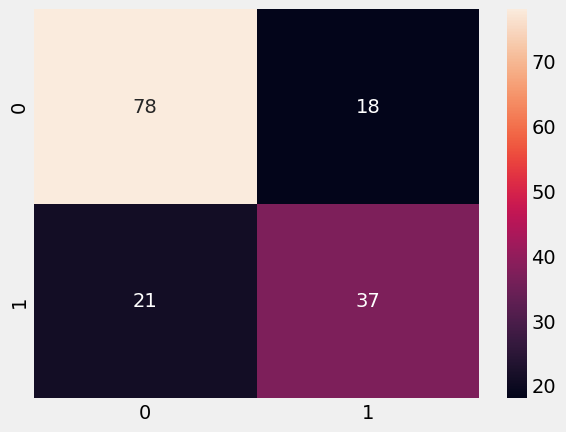

In [ ]:
cal(model1)

SVC()
accuracy is: 0.7662337662337663 recall is: 0.7209302325581395 f1 is: 0.6326530612244898


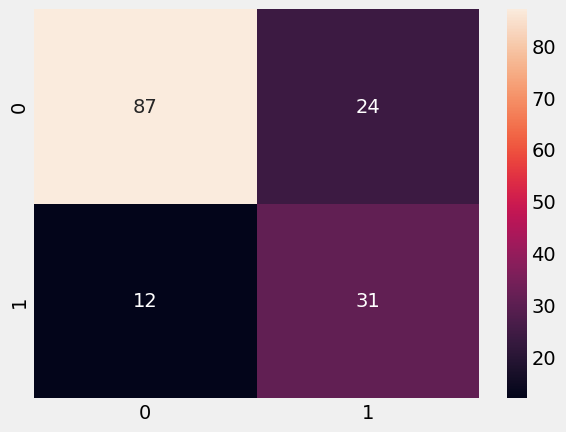

In [ ]:
cal(model2)

RandomForestClassifier()
accuracy is: 0.7532467532467533 recall is: 0.6491228070175439 f1 is: 0.6607142857142858


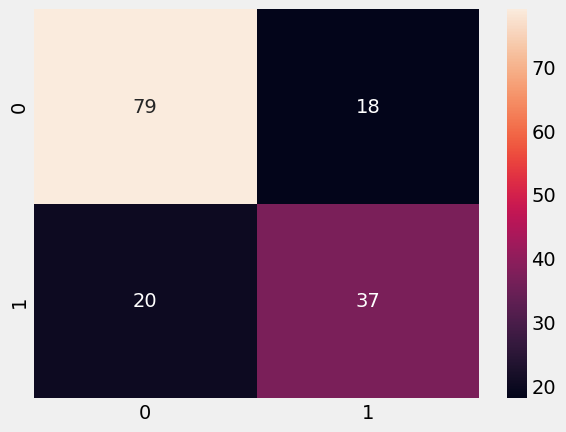

In [ ]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is: 0.7337662337662337 recall is: 0.609375 f1 is: 0.6554621848739497


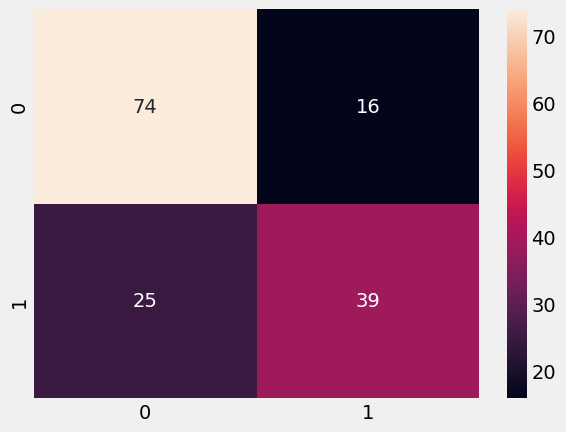

In [ ]:
cal(model4)

In [ ]:
result1

[0.7467532467532467,
 0.7662337662337663,
 0.7532467532467533,
 0.7337662337662337]

In [ ]:
result2

[0.6379310344827587, 0.7209302325581395, 0.6491228070175439, 0.609375]

In [ ]:
FinalRsult=pd.DataFrame({'Algorithm': columns, 'Accuracies': result1, 'Recall': result2 , 'FScore': result3})

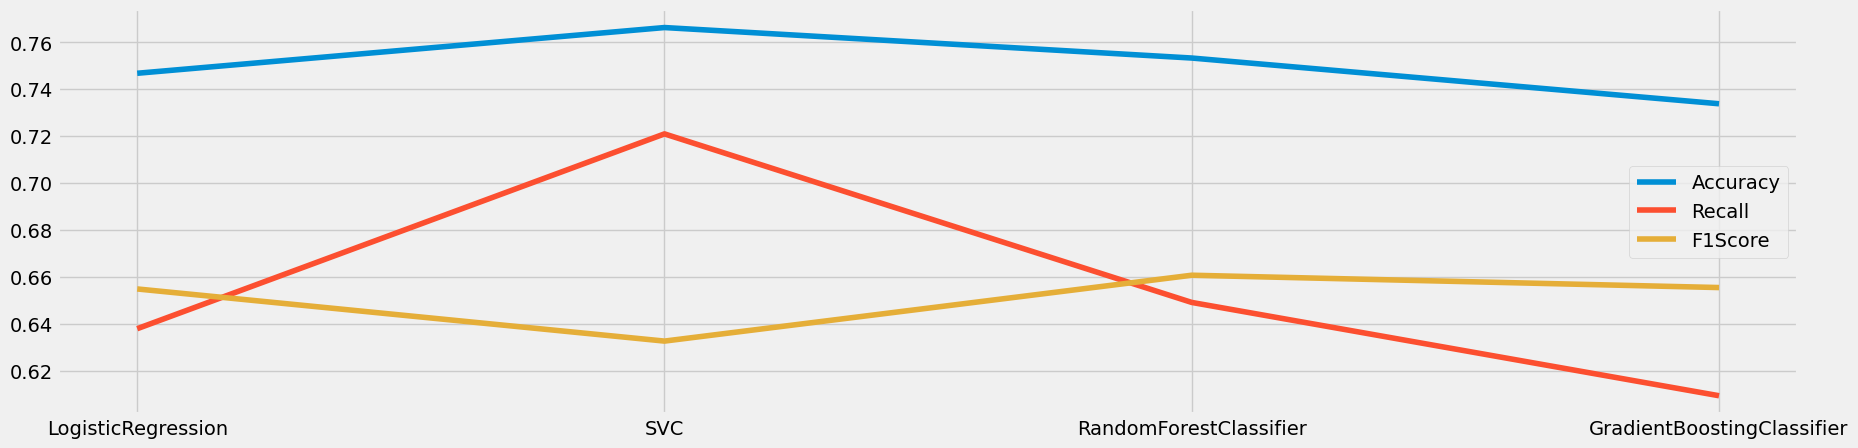

In [ ]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalRsult.Algorithm,result1 , label='Accuracy')
plt.plot(FinalRsult.Algorithm,result2, label='Recall')
plt.plot(FinalRsult.Algorithm,result3, label='F1Score')
plt.legend()
plt.show()

In [ ]:
model.save('Diabetes_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model




model =load_model('Diabetes_model.h5')
model.summary()
####make prediction


prediction = model.predict(x_test)


prediction

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 128)               12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

array([[0.50600123],
       [0.29029685],
       [0.33802673],
       [0.12059055],
       [0.2277369 ],
       [0.62567985],
       [0.22843464],
       [0.3207788 ],
       [0.5310676 ],
       [0.49804825],
       [0.4492193 ],
       [0.7420266 ],
       [0.11673637],
       [0.07409098],
       [0.12519209],
       [0.3075871 ],
       [0.18599577],
       [0.09494571],
       [0.4132747 ],
       [0.29620147],
       [0.23137699],
       [0.04305477],
       [0.49043143],
       [0.17620772],
       [0.3809526 ],
       [0.865506  ],
       [0.5346555 ],
       [0.03648154],
       [0.07288255],
       [0.08817189],
       [0.32618445],
       [0.54465246],
       [0.06995291],
       [0.54949355],
       [0.07887616],
       [0.25929502],
       [0.40642455],
       [0.07358395],
       [0.4771029 ],
       [0.6942263 ],
       [0.09597984],
       [0.53901064],
       [0.49323595],
       [0.23933381],
       [0.01985372],
       [0.06509991],
       [0.6601294 ],
       [0.288